# Torchvision Utilites for Visualization

`torchvision` provides utilites for visualizing images, bounding boxes and segmentation masks.

All the utilities do not perform inplace modification of inputs.


In [13]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import random
import scipy.misc

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

## Visualize Grid of Images

In [ ]:
from torchvision.utils import make_grid

Use `torchvision.utils.make_grid()` to create a grid of images.

You can also pad, mormalize and scale the images on the fly.

This utility can take 4D mini-batch Tensor of shape (B x C x H x W) or a list of images all of the same size.

In [3]:
lena = scipy.misc.face()
img = transforms.ToTensor()(lena)
print(img.size())

torch.Size([3, 768, 1024])
/home/oke/Aditya/PyTorch/vision/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1614931498178/work/torch/csrc/utils/tensor_numpy.cpp:179.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [4]:
imglist = [img, img, img, img.clone().fill_(-10)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


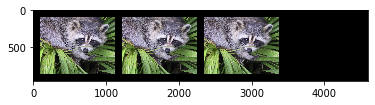

In [5]:
show(make_grid(imglist, padding=100))

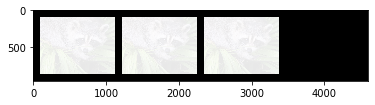

In [6]:
show(make_grid(imglist, padding=100, normalize=True))

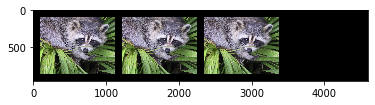

In [7]:
show(make_grid(imglist, padding=100, normalize=True, value_range=(0, 1)))

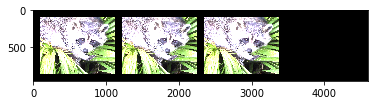

In [8]:
show(make_grid(imglist, padding=100, normalize=True, value_range=(0, 0.5)))

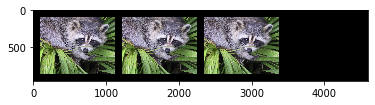

In [9]:
show(make_grid(imglist, padding=100, normalize=True, scale_each=True))

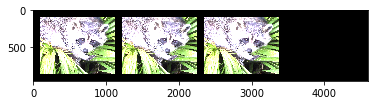

In [10]:
show(make_grid(imglist, padding=100, normalize=True, value_range=(0, 0.5), scale_each=True))

## Visualize Bounding Boxes

In [ ]:
from torchvision.utils import draw_bounding_boxes

You can use `torchvision.utils.draw_bounding_boxes` to draw boxes on image.

You can set the colors, labels, width as well as font and font size !

Note that this util requires a single image of dtype `uint8`.


torch.Size([3, 768, 1024])


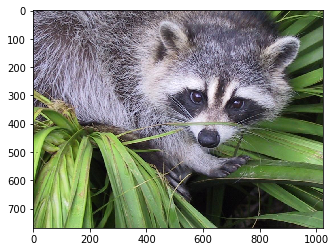

In [16]:
lena = scipy.misc.face()
img = transforms.ToTensor()(lena)
img = transforms.ConvertImageDtype(dtype=torch.uint8) (img)

print(img.size())

show(img)

We will draw a few box on lena!

Note that the boxes are in `(xmin, ymin, xmax, ymax)` format


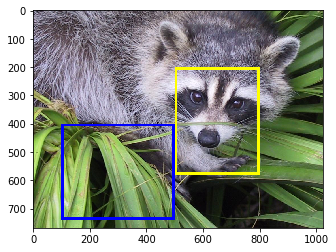

In [30]:
boxes = torch.tensor([[100, 400, 500, 740], [500, 200, 800, 580]], dtype=torch.float)
labels = ["grass", "lena"]
colors = ["blue", "yellow"]
result = draw_bounding_boxes(img, boxes, labels=labels, colors=colors, width=10)
show(result)

You can also `fill` the box with the color.

Note that after filling with color, one needs to save the resultant tensor in PNG i.e. 4 channel color format.


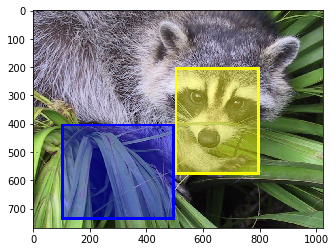

In [31]:
result = draw_bounding_boxes(img, boxes, labels=labels, colors=colors, width=10, fill=True)
show(result)

You can also plot bounding boxes produced from torchvision detection models.

Here is demo with torchvision's FasterRCNN.

In [33]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = fasterrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/oke/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100.0%


Let's load an image and get predictions from model.

In [ ]:
lena = scipy.misc.face()
img = transforms.ToTensor()(lena)

## Visualize Segmenation Masks

In [ ]:
from torchvision.utils import draw_segmentation_masks

You can use `torchvision.utils.draw_segmentation_masks` to draw boxes on image.

You can set the colors as well as transparency of masks drawn.

Note that this util requires a single RGB image of dtype `uint8`.


You can also plot segmentation masks produced from torchvision segmentation models.

Here is demo with torchvision's FCN Resnet-50